In [1]:
import itertools
from basics import *
from plotting import *
from scipy import stats

plt.style.use("paper")

In [2]:
root_dir = "../data/covsplit/"
models = sorted(os.listdir(root_dir))

In [3]:
dfs = []
for m in models:
    _df = pd.read_csv(f"{root_dir}/{m}/{m}-covsplit-test.csv", index_col=0)
    _df["facet"] = m
    dfs.append(_df)
    
df = pd.concat(dfs, axis=0)

In [4]:
df["npred"] = df["pred"] / df["nads"]
df["ntrue"] = df["energy"] / df["nads"]

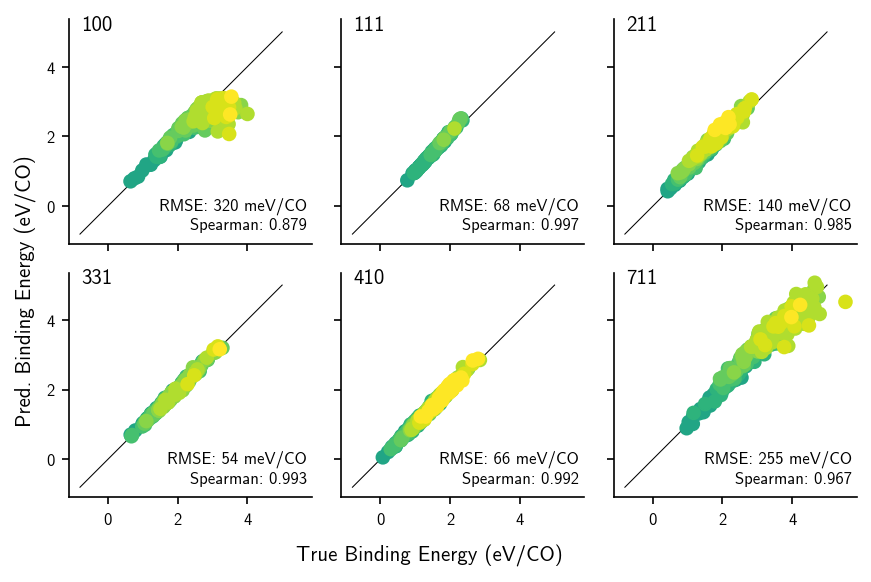

In [5]:
fig, axs = plt.subplots(2, 3, figsize=(6, 4), sharex=True, sharey=True)

norm = plt.Normalize(1, 18)
lims = (-0.8, 5.0)

for ax, (facet, grp) in zip(axs.reshape(-1), df.groupby("facet")):
    _x = grp["ntrue"]
    _y = grp["npred"]
    err = _y - _x
    rmse = np.sqrt((err ** 2).mean())
    spearman, _ = stats.spearmanr(_x, _y)

    ax.scatter(_x, _y, c=grp["nads"], norm=norm, cmap="viridis")

    ax.plot(lims, lims, "k-", zorder=-1, linewidth=0.5)

    ax.set_aspect("equal")

    metrics = "\n".join([
        f"RMSE: {rmse * 1000:.0f} meV/CO",
        f"Spearman: {spearman:.3f}",
    ])
    ax.annotate(
        metrics,
        (0.98, 0.05),
        xycoords="axes fraction",
        ha="right",
        va="bottom",
        fontsize=8
    )
    ax.annotate(facet, (0.05, 0.95), xycoords='axes fraction')

# ax.set_xlabel("True Bind. Energy (eV/CO)")
# ax.set_ylabel("Pred. Bind. Energy (eV/CO)")
fig.supxlabel("True Binding Energy (eV/CO)", y=0.04, fontsize=10)
fig.supylabel("Pred. Binding Energy (eV/CO)", x=0.04, fontsize=10)
fig.tight_layout()

savefig(fig, "02-extrapolation-coverage.png", dpi=300)
plt.show()